In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_excel('./../results/merged_GCDT_blups.xlsx', sheet_name='Espinal', na_values=['NA', '.', ''])
pedigree = pd.read_csv('./../data/pedigree_GCDT.csv') 
df.head()

,Trait,Genotype,predicted.values,standard.errors
0,YdHa,AMADEUS,1198.818,192.115
1,YdHa,GCDT_001,1165.224,191.278
2,YdHa,GCDT_002,875.425,191.739
3,YdHa,GCDT_003,1129.597,223.283
4,YdHa,GCDT_004,1429.134,190.896


In [3]:
pvDf = pd.pivot_table(columns='Trait', index='Genotype', values='predicted.values', data=df)
pvDf = pvDf.merge(pedigree[['Genotype', 'PopCode']], on='Genotype', how='left')



In [4]:
s1=30
s2=60
a1=0.6
a2=0.8

pedigree_style ={'G1':['#848fa5ff','s',s1,a1],
'G2':['#aa00d4ff','P',s1,a1],
'G3':['#e4ac2eff','P',s1,a1],
'G4':['#2b2d42ff','s',s1,a1],
'G5':['#3777ffff','P',s1,a1],
'G6':['#848fa5ff','P',s1,a1],
'G7':['#000000b4','P',s1,a1],
'G8':['#0b6e4fff','s',s1,a1],
'G9':['#c14952fe','s',s1,a1],
'G10':['#aa00d4ff','s',s1,a1],
'G11':['#91f5adff','s',s1,a1],
'G12':['#e4ac2eff','s',s1,a1],
'G13':['#3777ffff','s',s1,a1],
'G14':['#91f5adff','P',s1,a1],
'G40056':['#0b6e4fff','^',s2,a2],
'G40287':['#0b6e4fff','^',s2,a2],
 'G40001':['#0b6e4fff','^',s2,a2],
'INB_841':['#0b6e4fff','^',s2,a2],
'ICTA_LIGERO':['#c14953ff','^',s2,a2],
'SEF_010':['#c14953ff','^',s2,a2],
'SEN_118':['#c14953ff','^',s2,a2],
'SMC_214':['#c14953ff','^',s2,a2],
'SMR_155':['#c14953ff','^',s2,a2],
'VAP_001':['#c14953ff','^',s2,a2],
'AMADEUS':['#c14953ff','^',s2,a2],
'DOR_390':['#c14953ff','^',s2,a2],
'G40019':['#c14953ff','^',s2,a2],
'G40111':['#c14953ff','^',s2,a2],
'SEF_016':['#c14953ff','^',s2,a2],
'SEF_060':['#c14953ff','^',s2,a2],
'SEN_052':['#c14953ff','^',s2,a2],
'ROJO_SEDA':['#c14953ff','^',s2,a2],
'HTA_004':['#c14953ff','^',s2,a2],
'MAM_038':['#c14953ff','^',s2,a2],
'TIO_CANELA':['#c14953ff','^',s2,a2],
                
}
yAxis = {
    'NSV': '$Seed\ Number\ per\ pod\ (seeds\cdot pod^{-1})$',
    'PSN': '$Seed\ Number\ per\ pod\ (seeds\cdot pod^{-1})$',
    '100SW.1': '$Seed\ Weight\ (g\cdot100\ seeds^{-1})$',
    'X100SW.1':'$Seed\ Weight\ (g\cdot100\ seeds^{-1})$',
    'SW_100':'$Seed\ Weight\ (g\cdot100\ seeds^{-1})$',
    'YdHa': '$Yield\ per\ Hectare\ (Kg\cdot Ha^{-1})$',
    'YdPl': '$Yield\ per\ plant\ (g\cdot plant^{-1})$',
    'YdHa_verde': '$Yield\ per\ Hectare\ (Kg\cdot Ha^{-1})$',
    'PWW': '$Pod\ Wall\ Weight\ (g\cdot\ 10\ pods^{-1})$',
    'PHI': '$Pod\ Harvest\ Index\ (\%)$'
}


parents = pvDf[~pvDf.Genotype.str.startswith('GCDT')].Genotype.unique()

In [5]:
pvDf.loc[pvDf[pvDf['PopCode'].isna()].index,'PopCode'] = pvDf[pvDf['PopCode'].isna()]['Genotype']

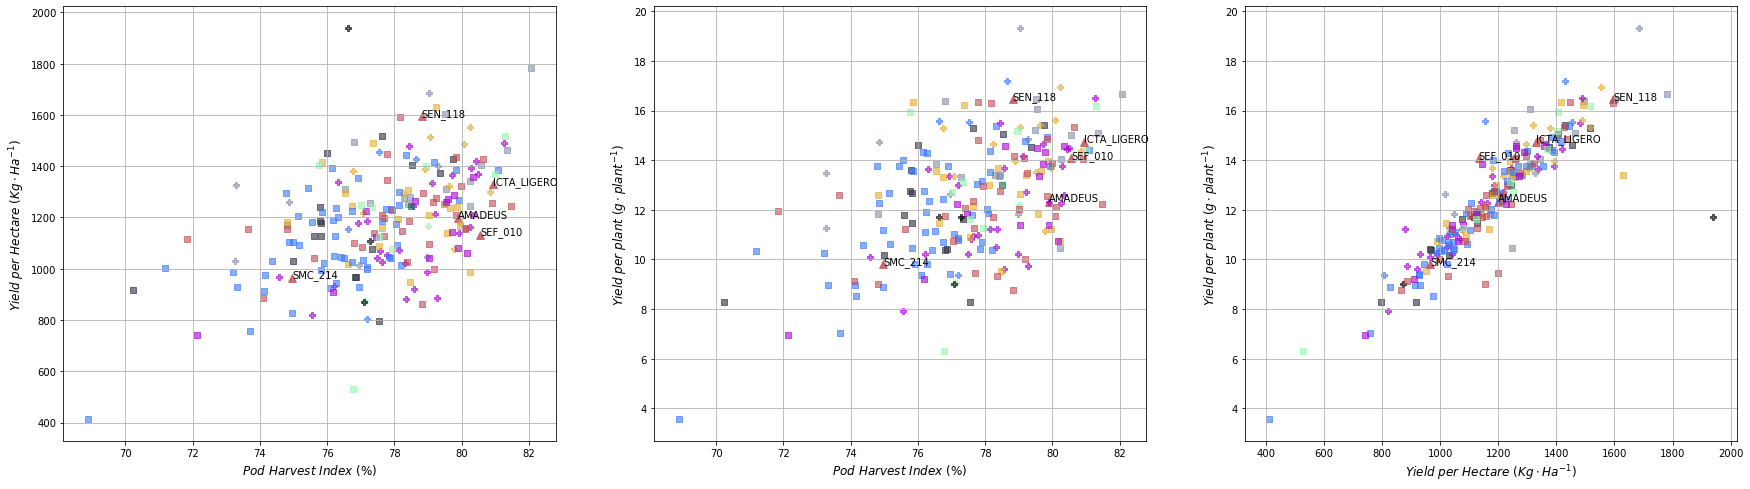

In [6]:
w = 10*3
h = 8
fig, axs = plt.subplots(1,3,figsize=(w,h))
axs = axs.flatten()

plots = [['PHI', 'YdHa'],['PHI', 'YdPl'],['YdHa', 'YdPl']]

for comb,ax in zip(plots,axs):
    data = pvDf.dropna(subset=comb)
    for i, row in data.iterrows():
        x =row[comb[0]]
        y =row[comb[1]]
        ax.scatter(x=x,
                   y=y,
                   marker=pedigree_style[row['PopCode']][1], 
                   c=pedigree_style[row['PopCode']][0], 
                   s=pedigree_style[row['PopCode']][2],
                   label=row['PopCode'],
                  alpha=pedigree_style[row['PopCode']][3])
        if row['Genotype'] in parents:
            ax.text(x,y, row['Genotype'])
    ax.set_xlabel(yAxis[comb[0]],size=12)
    ax.set_ylabel(yAxis[comb[1]],size=12)
    ax.grid()
    #ax.title('BLUPs %s & %s: Caribia 2021A'%comb)